In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sensors
import em_stoch

In [3]:
DIST_RATIO = 0.5

Num_sensors1 = 5
Num_emitters1 = 1
sample_size1 = 70
theta1_rad = [0.7] # Направление прибытия (DOA) в радианах
theta1_deg = np.rad2deg(theta1_rad) # Направление прибытия (DOA) в градусах
P_1 = 1 * np.eye(Num_emitters1, dtype=np.float64) # Ковариация шума
Q_1 = 0.4 * np.eye(Num_sensors1, dtype=np.float64) # Ковариация шума
A1 = (np.exp(-2j * np.pi * DIST_RATIO * np.arange(Num_sensors1).reshape(-1,1) * 
             np.sin(theta1_rad))) # Матрица управляющих векторов
# Генерация векторов сигнала, шума и принятого сигнала
S1 = sensors.gss(Num_emitters1, sample_size1, P_1)
n1 = sensors.gss(Num_sensors1, sample_size1, Q_1)
X1 = (A1 @ S1.T + n1.T).T

In [4]:
X1_with_mv = sensors.MCAR(X1, [0, 2, 4], [30, 30, 30])
X_full = X1_with_mv[~np.isnan(X1_with_mv).any(axis=1)]
print(X_full.shape)

(8, 5)


In [5]:
EM_theta1_rad, EM_P1, lhd_1, thetas1, Ps1 = em_stoch.multi_start_EM(X1_with_mv, Num_emitters1, Q_1, 10, 
                                                         max_iter=20, 
                                                         rtol=1e-4)

0-th start
Initial theta = [-2.83488836]
P=[[0.19485581]]
likelihood is -323.0178382439999 on iteration 0
P=[[0.64158071]]
likelihood is -222.16349585396085 on iteration 1
P=[[0.98502724]]
likelihood is -211.78404099026127 on iteration 2
P=[[1.05560191]]
likelihood is -210.5257707065029 on iteration 3
P=[[1.05918855]]
likelihood is -210.00192064599432 on iteration 4
P=[[1.05438102]]
likelihood is -209.74108920475933 on iteration 5
P=[[1.04985386]]
likelihood is -209.61150223722981 on iteration 6
P=[[1.04643905]]
likelihood is -209.54703841615682 on iteration 7
P=[[1.04392525]]
likelihood is -209.516694859237 on iteration 8
P=[[1.04205198]]
likelihood is -209.50368819126746 on iteration 9
P=[[1.04063401]]
likelihood is -209.49837377828467 on iteration 10
P=[[1.03954886]]
likelihood is -209.49729327026859 on iteration 11
P=[[1.0387094]]
likelihood is -209.49810350801158 on iteration 12
P=[[1.03805527]]
likelihood is -209.4996288717883 on iteration 13
P=[[1.03754286]]
likelihood is -209.5

In [6]:
EM_theta1_rad

array([0.70890325])

In [7]:
thetas1[7]

{0: array([0.89169724]),
 1: array([0.83288736]),
 2: array([0.79399656]),
 3: array([0.76778139]),
 4: array([0.74988829]),
 5: array([0.73755061]),
 6: array([0.72900296]),
 7: array([0.72303164]),
 8: array([0.71884287]),
 9: array([0.71589123]),
 10: array([0.71380632]),
 11: array([0.71232995]),
 12: array([0.71128854]),
 13: array([0.71054624]),
 14: array([0.7100121]),
 15: array([0.70963029]),
 16: array([0.70937979]),
 17: array([0.70918349]),
 18: array([0.70903431]),
 19: array([0.70890325])}

In [8]:
Ps1[7]

{0: np.float64(0.6322118752049738),
 1: np.float64(0.7661415305345336),
 2: np.float64(0.9022703283100855),
 3: np.float64(0.9816361958658897),
 4: np.float64(1.0186810409385731),
 5: np.float64(1.0341410984095543),
 6: np.float64(1.0399208735684329),
 7: np.float64(1.0415607236194677),
 8: np.float64(1.0415194950390347),
 9: np.float64(1.0408610304985402),
 10: np.float64(1.0400436382075031),
 11: np.float64(1.039254955998259),
 12: np.float64(1.0385626323622608),
 13: np.float64(1.0379814559682732),
 14: np.float64(1.037505572210284),
 15: np.float64(1.0371210678668228),
 16: np.float64(1.0368125031711015),
 17: np.float64(1.036565571825646),
 18: np.float64(1.0363689128920188),
 19: np.float64(1.036212320757886)}

In [9]:
Q_2 = 3.4 * np.eye(Num_sensors1, dtype=np.float64) # Ковариация шума
# Генерация векторов сигнала, шума и принятого сигнала
n2 = sensors.gss(Num_sensors1, sample_size1, Q_2)
X2 = (A1 @ S1.T + n2.T).T

In [10]:
X2_with_mv = sensors.MCAR(X2, [0, 2, 4], [30, 30, 30])
X2_full = X2_with_mv[~np.isnan(X2_with_mv).any(axis=1)]
print(X2_full.shape)

(8, 5)


In [11]:
EM_theta2_rad, EM_P2, lhd_2, thetas2, Ps2 = em_stoch.multi_start_EM(X2_with_mv, Num_emitters1, Q_2, 10, 
                                                         max_iter=20, 
                                                         rtol=1e-4)

0-th start
Initial theta = [-2.83488836]


P=[[1.03010733]]
likelihood is -689.9109718537796 on iteration 0
P=[[0.66708878]]
likelihood is -684.5951630213725 on iteration 1
P=[[0.50007042]]
likelihood is -682.4538888942188 on iteration 2
P=[[0.40031363]]
likelihood is -681.3413751606154 on iteration 3
P=[[0.333981]]
likelihood is -680.690350422368 on iteration 4
P=[[0.28737573]]
likelihood is -680.2795187780565 on iteration 5
P=[[0.25338558]]
likelihood is -680.0099406302187 on iteration 6
P=[[0.22784235]]
likelihood is -679.8276584830634 on iteration 7
P=[[0.20818055]]
likelihood is -679.7069998214921 on iteration 8
P=[[0.19273608]]
likelihood is -679.6333660102598 on iteration 9
P=[[0.18038452]]
likelihood is -679.5961026525257 on iteration 10
P=[[0.17034412]]
likelihood is -679.5878048267754 on iteration 11
P=[[0.16205127]]
likelihood is -679.6005577760967 on iteration 12
P=[[0.15510244]]
likelihood is -679.6292823956725 on iteration 13
P=[[0.14919516]]
likelihood is -679.6690473967187 on iteration 14
P=[[0.14410554]]
likeli

In [12]:
EM_theta2_rad

array([0.72911775])

In [13]:
SNR1 = np.trace(P_1)/np.trace(Q_1)
SNR2 = np.round(np.trace(P_1)/np.trace(Q_2),3)
print(SNR1)
print(SNR2)

0.5
0.059


In [14]:
thetas2[8]

{0: array([0.54267266]),
 1: array([0.56886548]),
 2: array([0.59216959]),
 3: array([0.61340414]),
 4: array([0.63232537]),
 5: array([0.64885688]),
 6: array([0.66304006]),
 7: array([0.67516456]),
 8: array([0.6854186]),
 9: array([0.69393138]),
 10: array([0.70124873]),
 11: array([0.70716121]),
 12: array([0.71200394]),
 13: array([0.7160079]),
 14: array([0.71933855]),
 15: array([0.72205958]),
 16: array([0.72430444]),
 17: array([0.72614965]),
 18: array([0.72782334]),
 19: array([0.72911775])}

In [15]:
Ps2[8]

{0: np.float64(0.5628291686467548),
 1: np.float64(0.5761445582002372),
 2: np.float64(0.598575910402849),
 3: np.float64(0.6206477344893342),
 4: np.float64(0.640845770320371),
 5: np.float64(0.659336601166355),
 6: np.float64(0.6761640417649077),
 7: np.float64(0.6910816931014099),
 8: np.float64(0.703869664985049),
 9: np.float64(0.714442180920795),
 10: np.float64(0.7228697482252585),
 11: np.float64(0.729415248120699),
 12: np.float64(0.7343249797771436),
 13: np.float64(0.7379008173675952),
 14: np.float64(0.7404335234831504),
 15: np.float64(0.7421751538019624),
 16: np.float64(0.7433282029203991),
 17: np.float64(0.7440556902372606),
 18: np.float64(0.7444824834681052),
 19: np.float64(0.7447072783758013)}

In [16]:
list(thetas1[7].keys())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

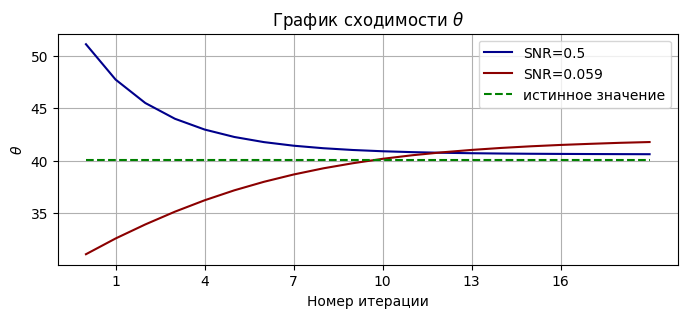

In [17]:
plt.figure(figsize=(8, 3))
plt.title(r'$\text{График сходимости} \,\,\theta$')
plt.plot(list(thetas1[7].keys()), np.rad2deg(list(thetas1[7].values())),color='darkblue', label=f'SNR={SNR1}')
plt.plot(list(thetas2[8].keys()), np.rad2deg(list(thetas2[8].values())),color='darkred', label=f'SNR={SNR2}')
plt.plot(list(thetas2[8].keys()), np.tile(theta1_deg, 20), color='green', label='истинное значение', linestyle='--')
plt.xlabel('Номер итерации') 
plt.ylabel(r'$\theta$')
plt.xticks(np.arange(1,18,3))
plt.legend()
plt.grid()
plt.show()

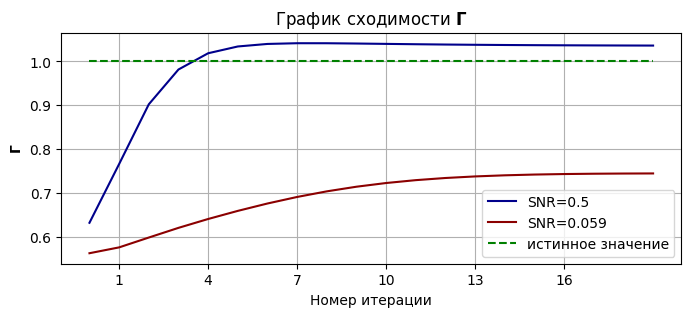

In [18]:
plt.figure(figsize=(8, 3))
plt.title(r'$\text{График сходимости} \,\,\mathbf{\Gamma}$')
plt.plot(list(thetas1[7].keys()), list(Ps1[7].values()),color='darkblue', label=f'SNR={SNR1}')
plt.plot(list(thetas2[8].keys()), list(Ps2[8].values()),color='darkred', label=f'SNR={SNR2}')
plt.plot(list(thetas2[8].keys()), np.tile(1, 20), color='green', label='истинное значение', linestyle='--')
plt.xlabel('Номер итерации') 
plt.ylabel(r'$\mathbf{\Gamma}$')
plt.xticks(np.arange(1,18,3))
plt.legend()
plt.grid()
plt.show()

In [19]:
theta1_deg

array([40.10704566])